In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [2]:
path = '/Users/tanlinyi/Downloads/'
binary_file = 'Binary Database_Tan.csv'
multi_file = 'Non-Binary Database_Tan.csv'

In [3]:
df_binary = pd.read_csv(path + binary_file)
df_multi = pd.read_csv(path + multi_file)

## Binary Classification

In [4]:
X_binary = df_binary.drop(columns=['target'])
y_binary = df_binary['target']

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)
train_df = pd.concat([X_train, y_train], axis=1)
train_df.to_csv(path + 'binary_train.csv', index=False)
val_df = pd.concat([X_val, y_val], axis=1)
val_df.to_csv(path + 'binary_val.csv', index=False)

### Binary Classification: Random Forest

In [6]:
plt.style.use('seaborn-v0_8')

In [7]:
# We will use the CV to tune the number of n_estimators
n_values = [100, 200, 300, 400, 500]
rf_scores = []
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [8]:
for n in n_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    cv_result = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='accuracy')
    rf_scores.append(cv_result.mean())

KeyboardInterrupt: 

In [50]:
best_result = max(rf_scores)
best_num = n_values[rf_scores.index(best_result)]
print(best_num)

400


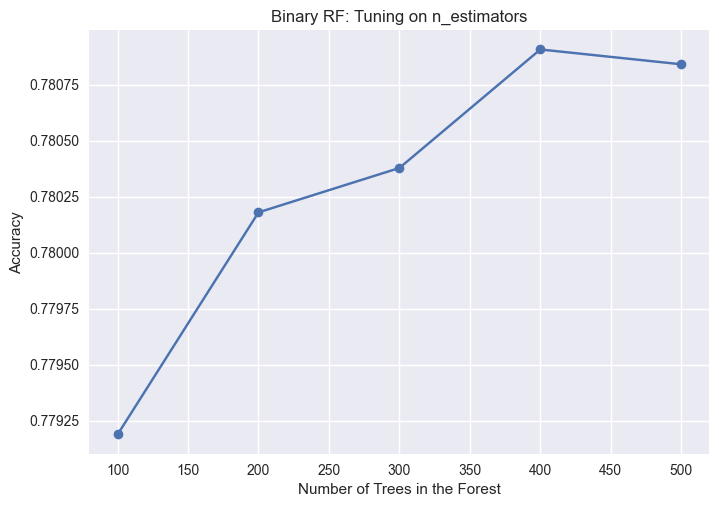

In [51]:
plt.plot(n_values, rf_scores, marker='o')
plt.xlabel('Number of Trees in the Forest')
plt.ylabel('Accuracy')
plt.title('Binary RF: Tuning on n_estimators')
plt.grid(True)
plt.savefig(path + 'Binary RF_RAW.png')
plt.show()

In [9]:
# Random Search for Other Common Hyperparameters
rf_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'max_features': ['sqrt', 'log2', 0.5],
    'n_estimators': [100, 200, 300, 400, 500]
}

In [11]:
rf = RandomForestClassifier(n_estimators=400, random_state=42)

In [12]:
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=10,
    cv=kfold,
    scoring='accuracy',
    random_state=42
)

In [13]:
rf_random.fit(X_train, y_train)
best_rf_params = rf_random.best_params_
print(best_rf_params)

{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 10}


In [56]:
# Final RF Model for Binary
final_rf = RandomForestClassifier(n_estimators=best_num,
                                  max_depth=best_rf_params['max_depth'],
                                  max_features=best_rf_params['max_features'],
                                  random_state=42
                                  )

In [57]:
# Training Time and Performance for RF Model
start_train = time.time()
final_rf.fit(X_train, y_train)
end_train = time.time()
rf_train_time = end_train - start_train
rf_train_acc = final_rf.score(X_train, y_train)

In [58]:
# Validation Time and Accuracy
start_test = time.time()
y_val_pred = final_rf.predict(X_val)
end_test = time.time()
rf_test_time = end_test - start_test
rf_val_acc = accuracy_score(y_val, y_val_pred)

In [59]:
print(f'Training Time: {round(rf_train_time, 4)} seconds')
print(f'Training Accuracy: {round(rf_train_acc, 4)}')
print(f'Test Time: {round(rf_test_time, 4)} seconds')
print(f'Validation Accuracy: {round(rf_val_acc, 4)}')

Training Time: 2.1897 seconds
Training Accuracy: 0.8493
Test Time: 0.0816 seconds
Validation Accuracy: 0.7819


### Binary Classification: SVM

In [60]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
kernel_scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for k in kernels:
    svm = SVC(kernel=k)
    cv_result = cross_val_score(svm, X_train, y_train, cv=kfold, scoring='accuracy')
    kernel_scores.append(cv_result.mean())

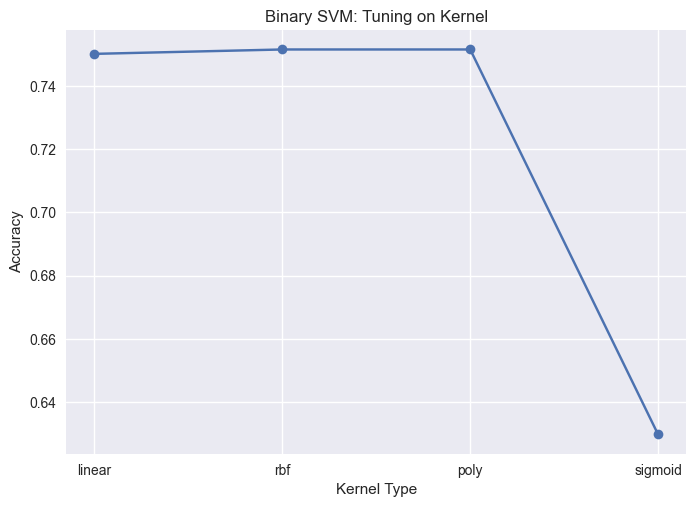

In [61]:
plt.plot(kernels, kernel_scores, marker='o')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('Binary SVM: Tuning on Kernel')
plt.grid(True)
plt.savefig(path + 'Binary SVM_RAW.png')
plt.show()

In [62]:
best_result = max(kernel_scores)
best_kernel = kernels[kernel_scores.index(best_result)]
print(best_kernel)

rbf


In [63]:
# svm_param_grid = {
#     'C': [0.01, 0.1, 1],
#     'gamma': [0.001, 0.01, 0.1],
#     'kernel' : ['linear', 'rbf', 'poly']
# }

In [64]:
# svm = SVC()

In [65]:
# svm_random = RandomizedSearchCV(
#     estimator=svm,
#     param_distributions=svm_param_grid,
#     n_iter=10,
#     cv=5,
#     scoring='accuracy',
#     random_state=42
# )

In [66]:
# svm_random.fit(X_train, y_train)
# best_svm_params = svm_random.best_params_
# print(best_svm_params)

In [67]:
# Final SVM Model
final_svm = SVC(C=0.1, gamma=0.01, kernel='rbf')

In [68]:
# Training Time for SVM Model
start_train = time.time()
final_svm.fit(X_train, y_train)
end_train = time.time()
svm_train_time = end_train - start_train
svm_train_acc = final_svm.score(X_train, y_train)

In [69]:
# Validation Time and Accuracy
start_test = time.time()
y_val_pred = final_svm.predict(X_val)
end_test = time.time()
svm_test_time = end_test - start_test
val_acc = accuracy_score(y_val, y_val_pred)

In [70]:
print(f'Training Time: {round(svm_train_time, 4)} seconds')
print(f'Training Accuracy: {round(svm_train_acc, 4)}')
print(f'Test Time: {round(svm_test_time, 4)} seconds')
print(f'Validation Accuracy: {round(val_acc, 4)}')

Training Time: 6.0998 seconds
Training Accuracy: 0.7516
Test Time: 1.3007 seconds
Validation Accuracy: 0.7462


## Non-Binary Models

In [71]:
X_multi = df_multi.drop(columns=['seniority_level'])
y_multi = df_multi['seniority_level']

In [72]:
X_train, X_val, y_train, y_val = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)
train_df = pd.concat([X_train, y_train], axis=1)
train_df.to_csv(path + 'multi_train.csv', index=False)
val_df = pd.concat([X_val, y_val], axis=1)
val_df.to_csv(path + 'multi_val.csv', index=False)

### Non-Binary Classification: Random Forest

In [73]:
# We will use the CV to tune the number of n_estimators
n_values = [100, 200, 300, 400, 500]
rf_scores = []
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [74]:
for n in n_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    cv_result = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='accuracy')
    rf_scores.append(cv_result.mean())

In [75]:
best_result = max(rf_scores)
best_num = n_values[rf_scores.index(best_result)]
print(best_num)

400


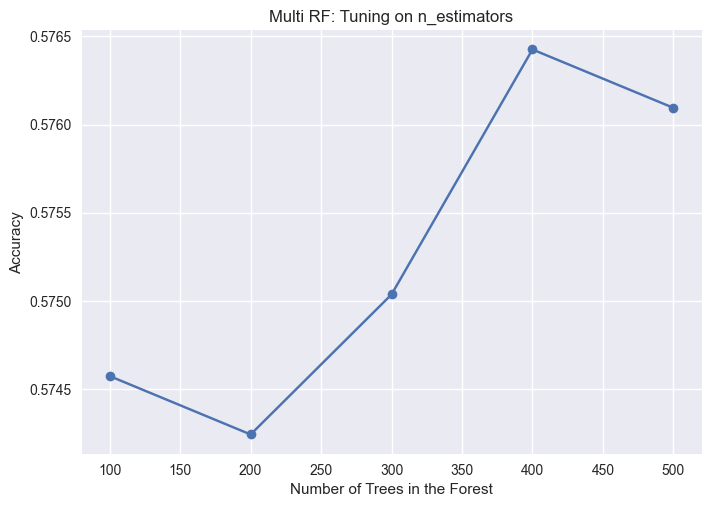

In [76]:
plt.plot(n_values, rf_scores, marker='o')
plt.xlabel('Number of Trees in the Forest')
plt.ylabel('Accuracy')
plt.title('Multi RF: Tuning on n_estimators')
plt.grid(True)
plt.savefig(path + 'Multi RF_RAW.png')
plt.show()

In [77]:
# # Random Search for Other Common Hyperparameters
# rf_param_grid = {
#     'max_depth': [None, 5, 10, 15, 20],
#     'max_features': ['sqrt', 'log2', 0.5],
#     'n_estimators': [100, 200, 300, 400, 500]
# }

In [78]:
# rf = RandomForestClassifier(n_estimators=best_num, random_state=42)

In [79]:
# rf_random = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=rf_param_grid,
#     n_iter=10,
#     cv=kfold,
#     scoring='accuracy',
#     random_state=42
# )
# rf_random.fit(X_train, y_train)

KeyboardInterrupt: 

In [23]:
# best_rf_params = rf_random.best_params_
# print(best_rf_params)

{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 10}


In [81]:
# Final RF Model for Binary
final_rf = final_rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=10,
    max_features='log2',
    random_state=42
)

In [82]:
# Training Time and Performance for RF Model
start_train = time.time()
final_rf.fit(X_train, y_train)
end_train = time.time()
rf_train_time = end_train - start_train
rf_train_acc = final_rf.score(X_train, y_train)

In [83]:
# Validation Time and Accuracy
start_test = time.time()
y_val_pred = final_rf.predict(X_val)
end_test = time.time()
rf_test_time = end_test - start_test
rf_val_acc = accuracy_score(y_val, y_val_pred)

In [84]:
print(f'Training Time: {round(rf_train_time, 4)} seconds')
print(f'Training Accuracy: {round(rf_train_acc, 4)}')
print(f'Test Time: {round(rf_test_time, 4)} seconds')
print(f'Validation Accuracy: {round(rf_val_acc, 4)}')

Training Time: 2.1462 seconds
Training Accuracy: 0.6913
Test Time: 0.0847 seconds
Validation Accuracy: 0.5981


### Non-Binary Classification: SVM

In [85]:
kernels = ['linear', 'rbf', 'poly']
kernel_scores = []

In [86]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
for k in kernels:
    svm = SVC(kernel=k)
    cv_result = cross_val_score(svm, X_train, y_train, cv=kfold, scoring='accuracy')
    kernel_scores.append(cv_result.mean())

In [22]:
best_result = max(kernel_scores)
best_kernel = kernels[kernel_scores.index(best_result)]
print(best_kernel)

rbf


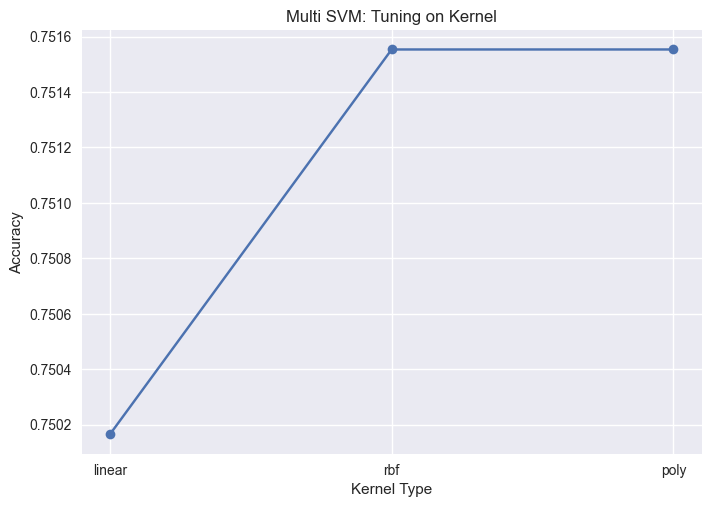

In [23]:
plt.plot(kernels, kernel_scores, marker='o')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('Multi SVM: Tuning on Kernel')
plt.grid(True)
plt.savefig(path + 'Multi SVM.png')
plt.show()

In [ ]:
# svm_param_grid = {
#     'C': [0.01, 0.1, 1],
#     'gamma': [0.001, 0.01, 0.1],
#     'kernel' : ['linear', 'rbf', 'poly']
# }

In [ ]:
# svm = SVC()

In [ ]:
# svm_random = RandomizedSearchCV(
#     estimator=svm,
#     param_distributions=svm_param_grid,
#     n_iter=10,
#     cv=5,
#     scoring='accuracy',
#     random_state=42
# )
# svm_random.fit(X_train, y_train)
# best_svm_params = svm_random.best_params_
# print(best_svm_params)

In [24]:
# Final SVM Model
final_svm = SVC(
    C=0.1,
    gamma=0.01,
    kernel=best_kernel
)

In [25]:
# Training Time for SVM Model
start_train = time.time()
final_svm.fit(X_train, y_train)
end_train = time.time()
svm_train_time = end_train - start_train
svm_train_acc = final_svm.score(X_train, y_train)

In [26]:
# Validation Time and Accuracy
start_test = time.time()
y_val_pred = final_svm.predict(X_val)
end_test = time.time()
svm_test_time = end_test - start_test
val_acc = accuracy_score(y_val, y_val_pred)

In [27]:
print(f'Training Time: {round(svm_train_time, 4)} seconds')
print(f'Training Accuracy: {round(svm_train_acc, 4)}')
print(f'Test Time: {round(svm_test_time, 4)} seconds')
print(f'Validation Accuracy: {round(val_acc, 4)}')

Training Time: 6.1077 seconds
Training Accuracy: 0.7516
Test Time: 1.3062 seconds
Validation Accuracy: 0.7462
